# Predictive Model

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
plt.rcParams.update({'font.size': 14})

# get current working directory
cwd = os.getcwd()
# read the csv
df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

df = df.reset_index(drop=True)
df_final = df
df_final

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


one hot encoding the categorical columns.

In [351]:
from sklearn.preprocessing import OneHotEncoder

# create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

# one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip', 2:'CircleTrip'})
df_final = df_final.join(encoder_df)

# drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

# store the label for supervised learning
label = df['booking_complete']
df_final = df_final.drop('booking_complete', axis=1)

df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizaing the values

In [352]:
from sklearn.preprocessing import StandardScaler

# create a standard scaler object
scaler = StandardScaler()

# fit and transform the data
scaled_df = scaler.fit_transform(df_final)

# create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

# add the labels back to the dataframe
scaled_df['label']  = label

scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


## Correlation matrix


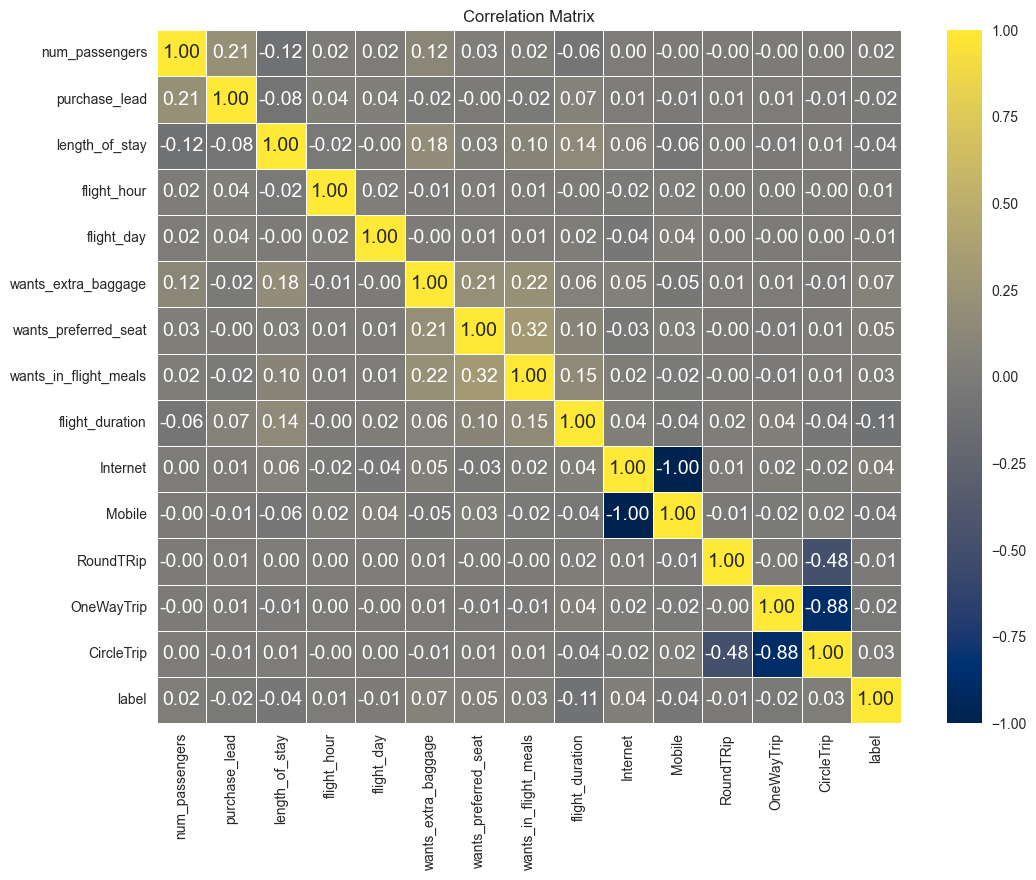

In [353]:
corr = scaled_df.corr()

plt.figure(figsize=(12, 9))
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='cividis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Now let's split the dataset into train and test sets.

## Splitting Train and Test Data

In [354]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [355]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from yellowbrick.classifier import ConfusionMatrix

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

# Random Forest Classifier

In [356]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

### Checking Training accuracy

In [357]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

# f1 score for training data
f1 = round(f1_score(y_train, y_pred_train)*100,2) 

# accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train)*100,2) 

# precision score for training data
pre = round(precision_score(y_train, y_pred_train)*100,2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 93.41, 99.94 and 71.99 respectively


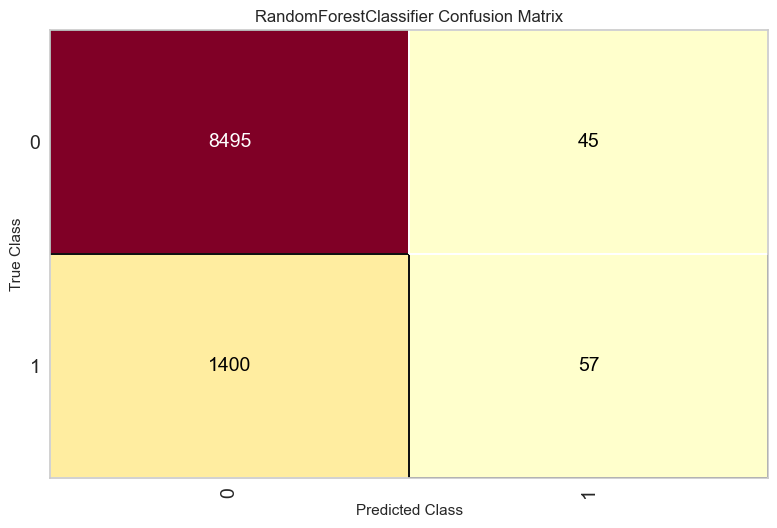

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [358]:
cm_viz = ConfusionMatrix(clf_rf, classes=clf_rf.classes_)
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)
cm_viz.show()

### Checking Testing accuracy

In [359]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test)*100,2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test)*100,2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test)*100,2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 85.55, 55.88 and 7.31 respectively


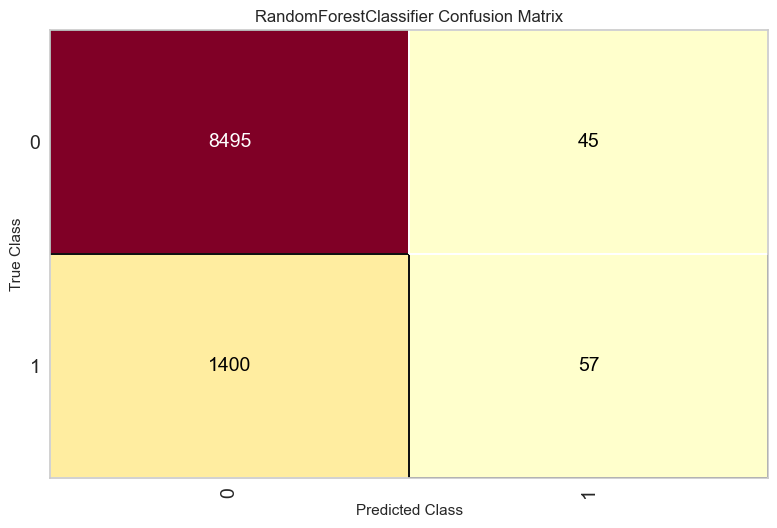

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [360]:
cm_viz = ConfusionMatrix(clf_rf, classes=clf_rf.classes_)
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)
cm_viz.show()

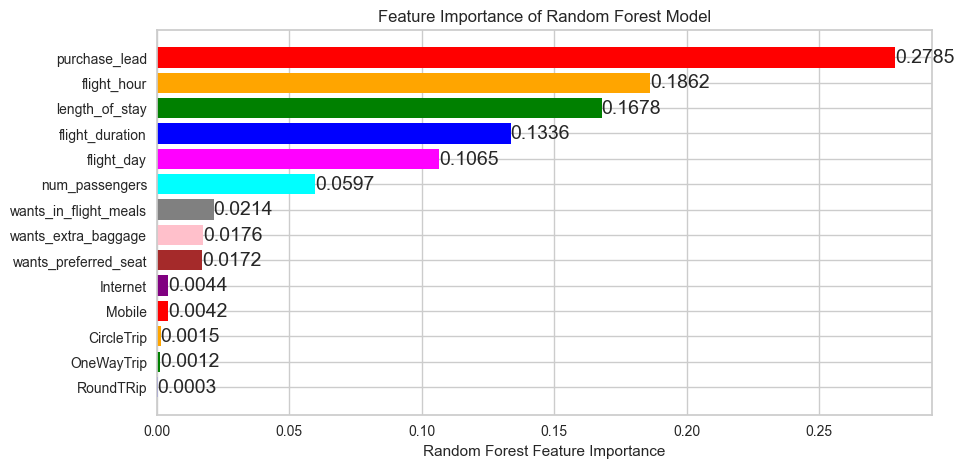

In [361]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Assuming clf_rf is your trained RandomForestClassifier
feature_importances = clf_rf.feature_importances_
sorted_idx = feature_importances.argsort()

# Define custom colors for the bars
custom_colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plotting horizontal bar chart with custom colors
plt.barh(scaled_df.iloc[:, :-1].columns[sorted_idx], feature_importances[sorted_idx], color=custom_colors)

# Adding numerical values on the bars
for index, value in enumerate(feature_importances[sorted_idx]):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center')

plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance of Random Forest Model")
plt.show()

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1. 

## Balancing the dataset

In [362]:
scaled_df.label.value_counts()

label
0    42506
1     7476
Name: count, dtype: int64

In [363]:
# create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label == 0].sample(n=8000)

# concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,1.380962,-0.575548,-0.060390,0.357443,0.093214,-1.421288,-0.650054,-0.863557,0.583016,-2.810681,2.810681,-0.048231,-0.088336,0.100826,0
1,-0.579424,-0.842445,-0.532474,-1.674891,1.598707,-1.421288,-0.650054,-0.863557,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
2,4.321541,1.615230,-0.561979,1.281231,1.096876,0.703587,-0.650054,-0.863557,-0.632900,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
3,-0.579424,-0.497703,0.234662,1.096473,-0.408618,-1.421288,-0.650054,1.158002,-1.688475,-2.810681,2.810681,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.219686,0.116641,-0.381588,-0.910449,0.703587,-0.650054,-0.863557,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,1.380962,-0.430979,-0.620990,1.650746,-1.412280,-1.421288,1.538334,-0.863557,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
17472,3.341348,0.903505,-0.502969,1.465988,0.093214,0.703587,1.538334,1.158002,-0.572772,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
17473,-0.579424,0.202901,-0.561979,1.465988,0.595045,-1.421288,-0.650054,-0.863557,-0.185282,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
17474,-0.579424,-0.809083,2.211513,0.911715,0.595045,-1.421288,-0.650054,-0.863557,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


In [364]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [365]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.62, 0.57, 0.47, 0.74 and 0.51 respectively


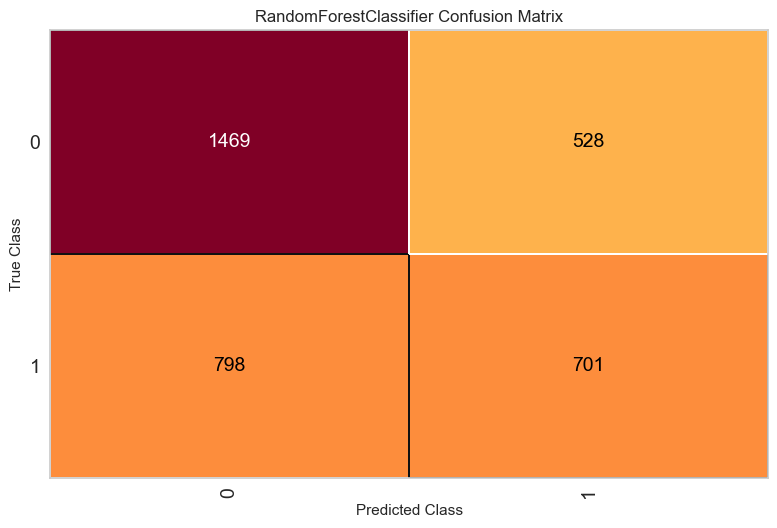

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [366]:
cm_viz = ConfusionMatrix(clf_rf, classes=clf_rf.classes_)
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)
cm_viz.show()

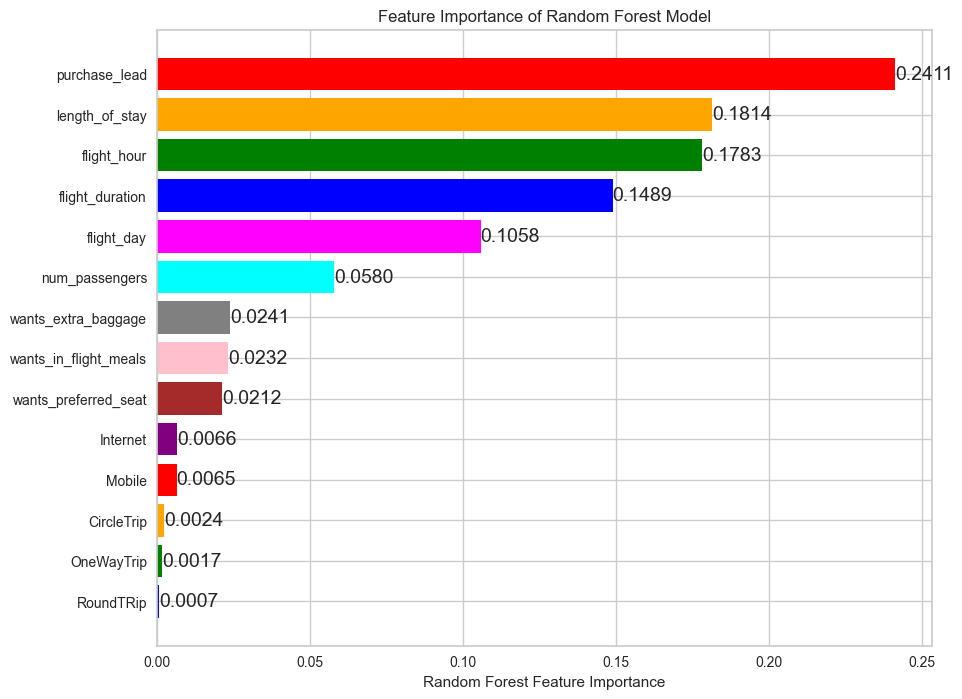

In [367]:
plt.figure(figsize=(10,8))

# Assuming clf_rf is your trained RandomForestClassifier
feature_importances = clf_rf.feature_importances_
sorted_idx = feature_importances.argsort()

# Define custom colors for the bars
custom_colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plotting horizontal bar chart with custom colors
plt.barh(scaled_df.iloc[:, :-1].columns[sorted_idx], feature_importances[sorted_idx], color=custom_colors)

# Adding numerical values on the bars
for index, value in enumerate(feature_importances[sorted_idx]):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center')

plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance of Random Forest Model")
plt.show()